In [ ]:
!unzip 'Sarcasm_Headlines_Dataset.json.zip' -d Sarcasm

## Import Libraries

In [1]:
import json
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

In [2]:
vocab_size = 10000
embedding_dim = 16
max_length = 100
trunc_type='post'
padding_type='post'
oov_tok = "<OOV>"
training_size = 20000

## Load the dataset and process it

In [3]:
dataset = []
for file in open('Sarcasm/Sarcasm_Headlines_Dataset.json','r'):
    dataset.append(json.loads(file))

#### to display first 5 element from the given data

In [4]:
def head(data):
    return data[0:5]

In [5]:
head(dataset)

[{'is_sarcastic': 1,
  'headline': 'thirtysomething scientists unveil doomsday clock of hair loss',
  'article_link': 'https://www.theonion.com/thirtysomething-scientists-unveil-doomsday-clock-of-hai-1819586205'},
 {'is_sarcastic': 0,
  'headline': 'dem rep. totally nails why congress is falling short on gender, racial equality',
  'article_link': 'https://www.huffingtonpost.com/entry/donna-edwards-inequality_us_57455f7fe4b055bb1170b207'},
 {'is_sarcastic': 0,
  'headline': 'eat your veggies: 9 deliciously different recipes',
  'article_link': 'https://www.huffingtonpost.com/entry/eat-your-veggies-9-delici_b_8899742.html'},
 {'is_sarcastic': 1,
  'headline': 'inclement weather prevents liar from getting to work',
  'article_link': 'https://local.theonion.com/inclement-weather-prevents-liar-from-getting-to-work-1819576031'},
 {'is_sarcastic': 1,
  'headline': "mother comes pretty close to using word 'streaming' correctly",
  'article_link': 'https://www.theonion.com/mother-comes-pretty-

In [6]:
sentences = []
labels = []
urls = []
for data in dataset : 
    sentences.append(data['headline'])
    labels.append(data['is_sarcastic'])
    urls.append(data['article_link'])

In [7]:
head(sentences),head(labels),head(urls)

(['thirtysomething scientists unveil doomsday clock of hair loss',
  'dem rep. totally nails why congress is falling short on gender, racial equality',
  'eat your veggies: 9 deliciously different recipes',
  'inclement weather prevents liar from getting to work',
  "mother comes pretty close to using word 'streaming' correctly"],
 [1, 0, 0, 1, 1],
 ['https://www.theonion.com/thirtysomething-scientists-unveil-doomsday-clock-of-hai-1819586205',
  'https://www.huffingtonpost.com/entry/donna-edwards-inequality_us_57455f7fe4b055bb1170b207',
  'https://www.huffingtonpost.com/entry/eat-your-veggies-9-delici_b_8899742.html',
  'https://local.theonion.com/inclement-weather-prevents-liar-from-getting-to-work-1819576031',
  'https://www.theonion.com/mother-comes-pretty-close-to-using-word-streaming-cor-1819575546'])

## Split the Data train, test

In [8]:
len(sentences)

28619

#### build function to handle spliting data

In [9]:
def train_test_split(data,percent):
    split_size = int(len(data) * percent)
    train = data[0:training_size]
    test = data[training_size:]
    return train,test

In [10]:
training_sentences,testing_sentences = train_test_split(sentences,0.8)
training_labels,testing_labels = train_test_split(labels,0.8)

In [11]:
tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(training_sentences)

word_index = tokenizer.word_index

training_sequences = tokenizer.texts_to_sequences(training_sentences)
training_padded = pad_sequences(training_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

testing_sequences = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(testing_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

In [12]:
training_padded = np.array(training_padded)
training_labels = np.array(training_labels)
testing_padded = np.array(testing_padded)
testing_labels = np.array(testing_labels)

## Build the model

In [13]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

2022-07-26 22:17:23.915968: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-07-26 22:17:24.073621: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-07-26 22:17:24.074826: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-07-26 22:17:24.077308: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 100, 16)           160000    
_________________________________________________________________
global_average_pooling1d (Gl (None, 16)                0         
_________________________________________________________________
dense (Dense)                (None, 24)                408       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 25        
Total params: 160,433
Trainable params: 160,433
Non-trainable params: 0
_________________________________________________________________


In [15]:
epochs_num = 40

history = model.fit(training_padded, training_labels, epochs=epochs_num, validation_data=(testing_padded, testing_labels), verbose=2)

Epoch 1/40


2022-07-26 22:17:27.355431: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


625/625 - 4s - loss: 0.6474 - accuracy: 0.6341 - val_loss: 0.5143 - val_accuracy: 0.8145
Epoch 2/40
625/625 - 2s - loss: 0.3987 - accuracy: 0.8425 - val_loss: 0.3728 - val_accuracy: 0.8339
Epoch 3/40
625/625 - 2s - loss: 0.2982 - accuracy: 0.8813 - val_loss: 0.3356 - val_accuracy: 0.8571
Epoch 4/40
625/625 - 2s - loss: 0.2477 - accuracy: 0.9025 - val_loss: 0.3385 - val_accuracy: 0.8546
Epoch 5/40
625/625 - 2s - loss: 0.2124 - accuracy: 0.9192 - val_loss: 0.3359 - val_accuracy: 0.8573
Epoch 6/40
625/625 - 2s - loss: 0.1865 - accuracy: 0.9287 - val_loss: 0.3568 - val_accuracy: 0.8466
Epoch 7/40
625/625 - 2s - loss: 0.1645 - accuracy: 0.9391 - val_loss: 0.3649 - val_accuracy: 0.8525
Epoch 8/40
625/625 - 2s - loss: 0.1488 - accuracy: 0.9471 - val_loss: 0.4154 - val_accuracy: 0.8350
Epoch 9/40
625/625 - 2s - loss: 0.1320 - accuracy: 0.9520 - val_loss: 0.4081 - val_accuracy: 0.8442
Epoch 10/40
625/625 - 2s - loss: 0.1201 - accuracy: 0.9577 - val_loss: 0.4530 - val_accuracy: 0.8340
Epoch 11/4

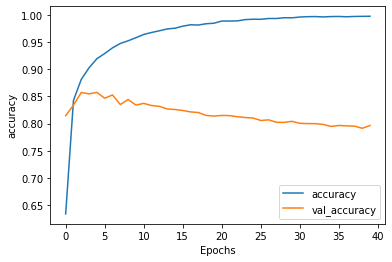

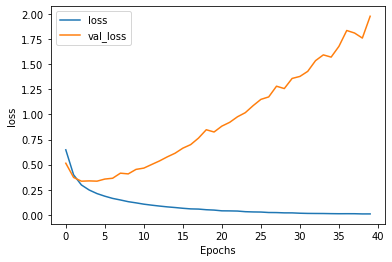

In [16]:
def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()
  
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

## Test the model

In [ ]:
test_data = [
   'the weather is so moony',
   'the president kill the devil',
   'earthquake in sky!!!'
]

sequences = tokenizer.texts_to_sequences(test_data)
padded = pad_sequences(sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

prediction = model.predict(padded)
prediction

In [ ]:
def label_encoding(pred):
  return ['Real' if p > 0.5 else 'Fake' for p in pred]

In [ ]:
print(label_encoding(prediction))